# Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

from art.utils import load_cifar10
from art.attacks.evasion import HopSkipJump
from art.estimators.classification import TensorFlowV2Classifier

# Load Data

In [2]:
(x_train, y_train), (x_test, y_test), min_, max_ = load_cifar10()

In [3]:
cifar10_class_labels = ["airplane", "automobile", "bird", "cat", "deer",
                        "dog", "frog", "horse", "ship", "truck"]

# Model

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    
    Dense(512, activation="relu"),
    Dense(10)
])

In [5]:
model.compile(optimizer='adam', loss=CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train 

In [6]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 8s 13ms/step - loss: 1.4380 - accuracy: 0.4843 - val_loss: 1.1587 - val_accuracy: 0.5863
Epoch 2/10
391/391 [==============================] - 4s 10ms/step - loss: 0.9984 - accuracy: 0.6499 - val_loss: 0.9063 - val_accuracy: 0.6788
Epoch 3/10
391/391 [==============================] - 4s 10ms/step - loss: 0.7884 - accuracy: 0.7250 - val_loss: 0.8451 - val_accuracy: 0.7072
Epoch 4/10
391/391 [==============================] - 4s 9ms/step - loss: 0.6391 - accuracy: 0.7773 - val_loss: 0.7708 - val_accuracy: 0.7342
Epoch 5/10
391/391 [==============================] - 4s 10ms/step - loss: 0.5055 - accuracy: 0.8233 - val_loss: 0.7444 - val_accuracy: 0.7558
Epoch 6/10
391/391 [==============================] - 4s 10ms/step - loss: 0.3834 - accuracy: 0.8655 - val_loss: 0.8140 - val_accuracy: 0.7390
Epoch 7/10
391/391 [==============================] - 4s 10ms/step - loss: 0.2649 - accuracy: 0.9083 - val_loss: 0.8677 - val_accuracy: 0.7460


In [7]:
classifier = TensorFlowV2Classifier(
    model=model,
    loss_object=CategoricalCrossentropy(from_logits=True),
    nb_classes=10,
    input_shape=(32, 32, 3),
    preprocessing=(0.5, 1),
    clip_values=(min_, max_)
)

# Attack

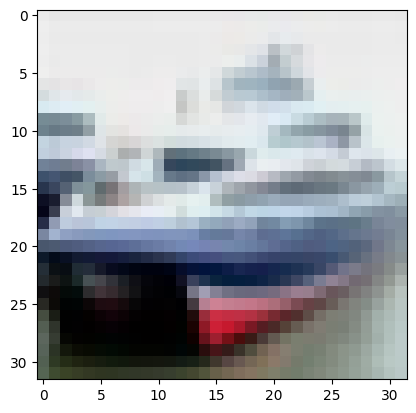

In [10]:
init_image = x_test[1]
plt.imshow(init_image)

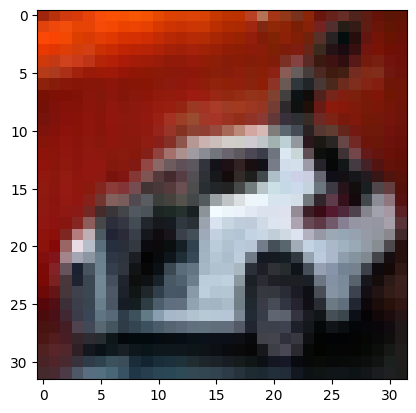

In [17]:
target_image = x_test[6]
plt.imshow(target_image)

In [115]:
attack = HopSkipJump(classifier=classifier, targeted=False, max_iter=0, max_eval=1000, init_eval=10)

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

[Step 10/200] [L2 Error: 2.46]


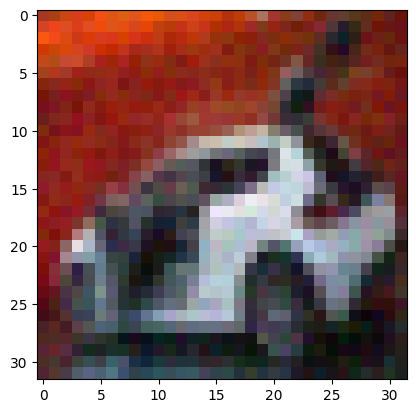

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

[Step 20/200] [L2 Error: 0.64]


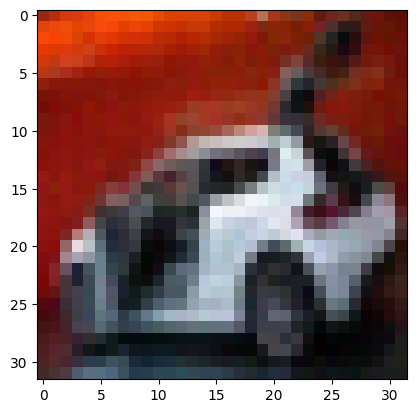

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

[Step 30/200] [L2 Error: 0.43]


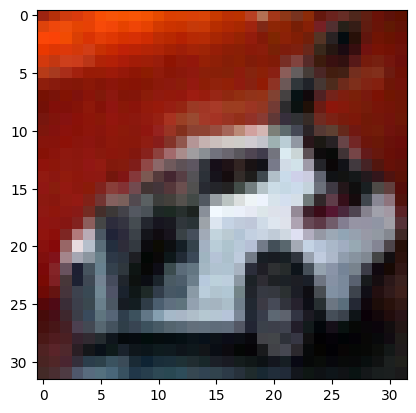

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

[Step 40/200] [L2 Error: 0.36]


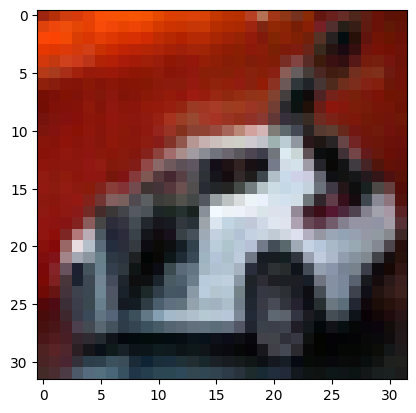

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

[Step 50/200] [L2 Error: 0.32]


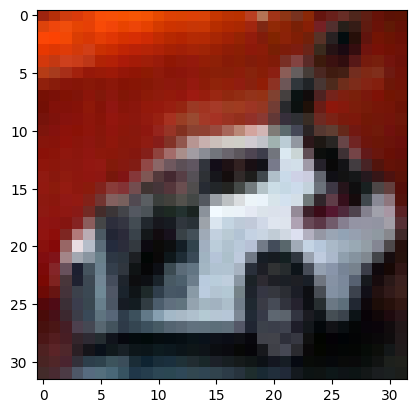

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

[Step 60/200] [L2 Error: 0.31]


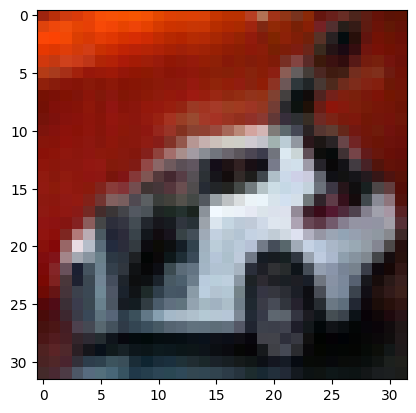

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

[Step 70/200] [L2 Error: 0.28]


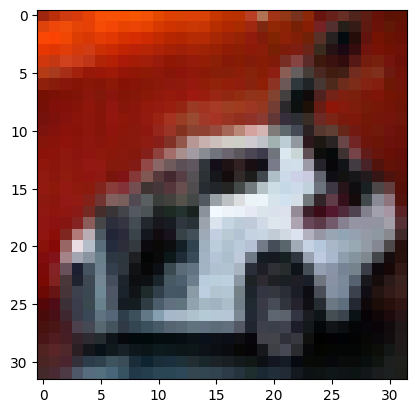

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

[Step 80/200] [L2 Error: 0.26]


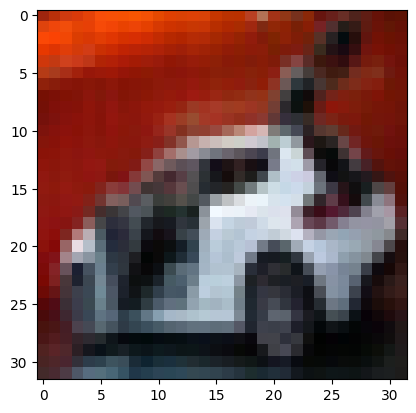

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

[Step 90/200] [L2 Error: 0.26]


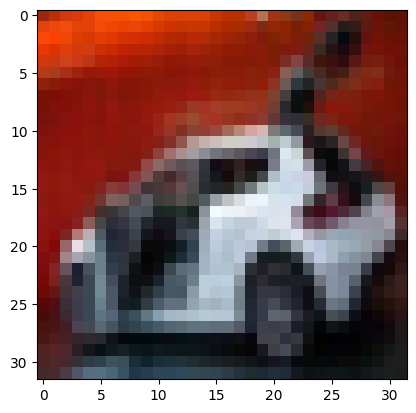

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

[Step 100/200] [L2 Error: 0.25]


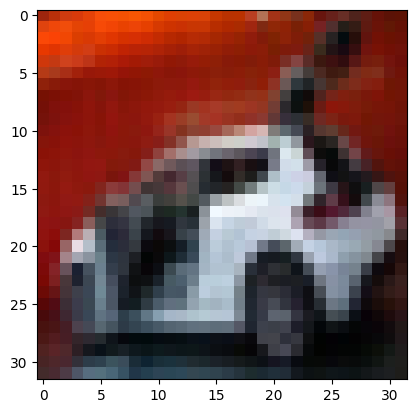

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

[Step 110/200] [L2 Error: 0.24]


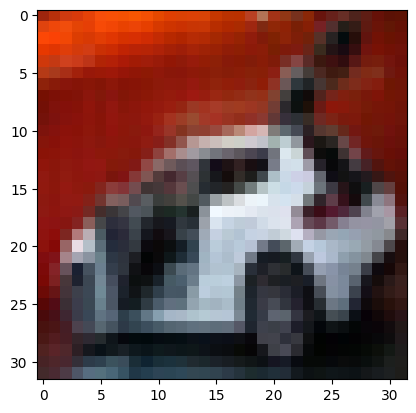

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

[Step 120/200] [L2 Error: 0.23]


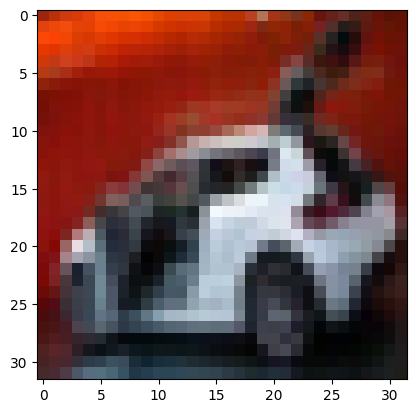

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

[Step 130/200] [L2 Error: 0.23]


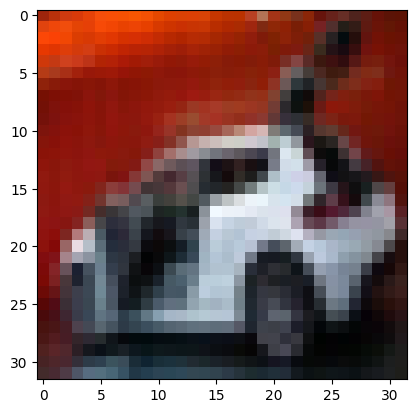

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

[Step 140/200] [L2 Error: 0.22]


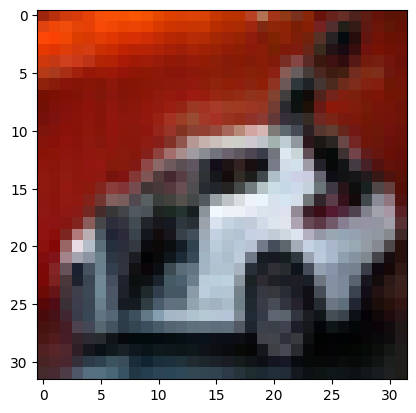

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

[Step 150/200] [L2 Error: 0.22]


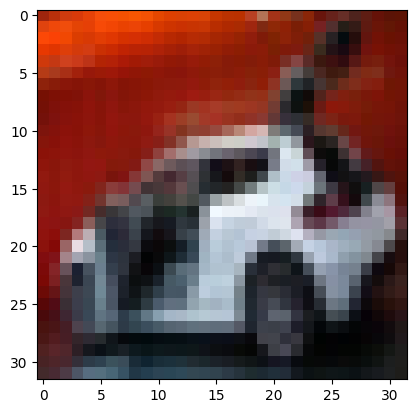

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

[Step 160/200] [L2 Error: 0.21]


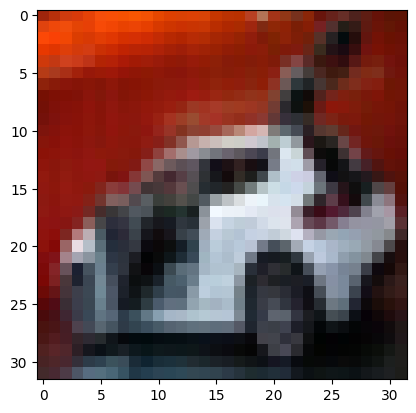

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

[Step 170/200] [L2 Error: 0.21]


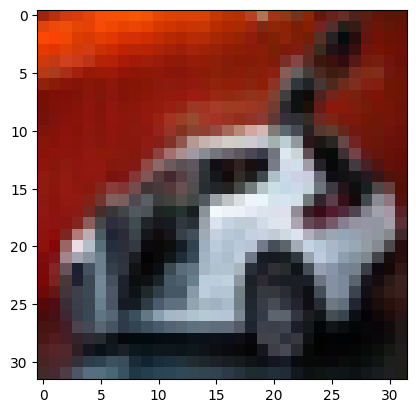

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

[Step 180/200] [L2 Error: 0.21]


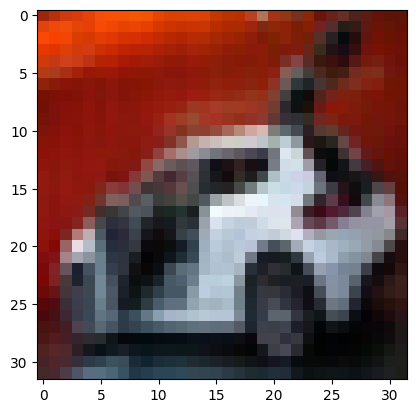

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

[Step 190/200] [L2 Error: 0.20]


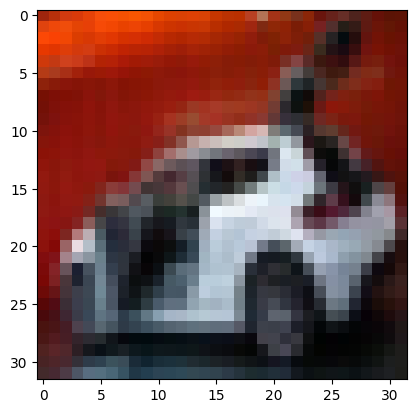

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

[Step 200/200] [L2 Error: 0.20]


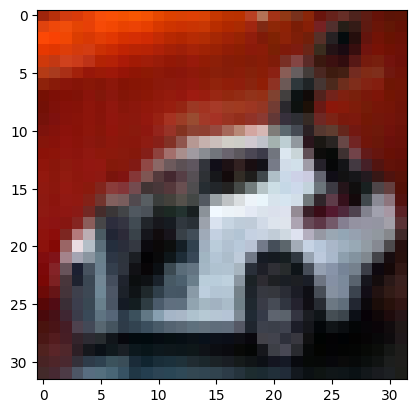

In [117]:
iter_step = 10
x_adv = np.array([init_image])
mask = np.random.binomial(n=1, p=0.9, size=np.prod(target_image.shape))
mask = mask.reshape(target_image.shape)

for i in range(20):
    x_adv = attack.generate(x=np.array([target_image]),
                            y=y_test[1],
                            x_adv_init=x_adv, 
                            resume=True, 
                            mask=mask)

    print(f"[Step {(i+1) * iter_step}/200] [L2 Error: {np.linalg.norm(np.reshape(x_adv[0] - target_image, [-1])):.2f}]")
    attack.max_iter = iter_step

    plt.figure()
    plt.imshow((x_adv[0] * 255).astype(np.uint))
    plt.show()

# Results

In [118]:
y_pred = model.predict(x_test[1, :, :, :][np.newaxis, :, :, :], verbose=0)
y_pred = np.argmax(y_pred)
y_pred = cifar10_class_labels[y_pred]

In [119]:
adv_pred = model.predict(x_adv[0, :, :, :][np.newaxis, :, :, :], verbose=0)
adv_pred = np.argmax(adv_pred)
adv_pred = cifar10_class_labels[adv_pred]

In [120]:
print("Original Image Prediction:", y_pred)
print("Adversarial Image Prediction:", adv_pred)

Original Image Prediction: ship
Adversarial Image Prediction: automobile


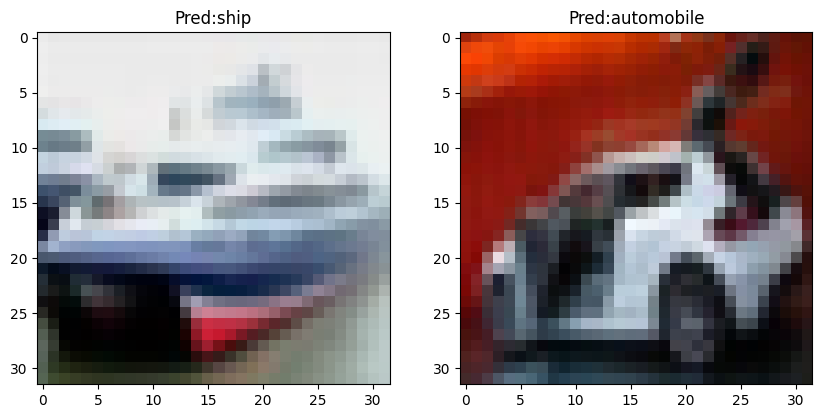

In [121]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

axes[0].imshow(x_test[1])
axes[0].set_title("Pred:" + y_pred)

axes[1].imshow(x_adv[0])
axes[1].set_title("Pred:" + adv_pred)

plt.show()